## 1. Objetivo:
 * Implementar uma Rede Neural Recorrente (RNN) simples em Python pra prever a próxima palavra em uma sequência de texto, utilizando biblioteca TensorFlow/Keras.
 * Implementar uma Rede Long Short-Term Memory (LSTM) em Python para classificar o sentimento de frases como "positivo" ou "negativo", utilizando a biblioteca TensorFlow/Keras.

## 2. Etapas de Desenvolvimento (Fluxo do Programa):

### 2.1. Implementação: RNN Simples para Previsão da Próxima Palavra

* Etapa 1: Preparação dos dados: Coletar e pré-processar um corpus de texto para treinamento.
* Etapa 2: Construção do modelo RNN: Definir a arquitetura da RNN simples.
* Etapa 3: Treinamento do modelo: Treinar a RNN usando o corpus preparado.
* Etapa 4: Avaliação do modelo: Avaliar o desempenho da RNN na previsão da próxima palavra.
* Etapa 5: Teste do modelo: Testar o modelo com novas frases.

### 2.2. Implementação 2: LSTMs para Classificação de Sentimentos

* Etapa 1: Preparação dos dados: Coletar e pré-processar um conjunto de frases rotulados (positivo/negativo)
* Etapa 2: Construção do modelo LSTM: Definir a arquitetura da LSTM.
* Etapa 3: Treinamento do modelo: Treinar a LSTM usando os dados rotulados
* Etapa 4: Avaliação do modelo: Avaliar desempenho da LSTM na classificação de sentimentos
* Etapa 5: Teste do modelo: Testar o modelo com novas fases

# 3. Implementação 1: Modelo de Rede Neural de Recorrência

### Passo 1: Configuração de Ambiente no Google Colab

In [1]:
# Importa a biblioteca NumPy, usada para operações numéricas e manipulação de arrays
import numpy as np

# Importa o TensorFlow, um framework de aprendizado de máquina amplamente utilizado
import tensorflow as tf

# Importa a classe Sequential, que permite criar modelos de rede neural camada por camada
from tensorflow.keras.models import Sequential

# Importa as camadas utilizadas: Embedding, SimpleRNN e Dense
# Embedding transforma palavras em vetores densos
# SimpleRNN é uma rede neural recorrente simples
# Dense é uma camada totalmente conectada
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Importa o Tokenizer, ferramenta para transformar texto em sequências de números inteiros
from tensorflow.keras.preprocessing.text import Tokenizer

# Importa a função pad_sequences, que ajusta o comprimento das sequências de entrada (completa ou corta)
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Exibe mensagem indicando que todas as bibliotecas foram importadas com sucesso
print("Bibliotecas importadas com sucesso")


Bibliotecas importadas com sucesso


Explicação:
* numpy: Para operações numéricas
* tensorflow.keras: A API de alto nível para construir e treinar modelos de deep learning
* Embedding: Camada que transforma palavras (indices numéricos) em vetores densos
* SimpleRNN: A camada de Rede Neural Recorrente mais básica
* Dense: Camada neural comum (fully connected layer)
* Tokenizer: Para converter texto em sequências de números
* pad_sequences: Para garantir que todas as sequências de entrada tenham o mesmo comprimento

### Passo 2: Preparação do Conjunto de Dados

In [2]:
# Define um pequeno conjunto de textos que será usado como base para treinar a rede neural
# Cada item da lista é uma frase curta em português
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas"
]

# Exibe no console os textos definidos para o treinamento
print(f"Textos de treinamento: {textos_treinamento}")


Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [3]:
# Inicializa o Tokenizer, que será responsável por converter palavras em números inteiros
tokenizer = Tokenizer()

# Gera o vocabulário com base nos textos de treinamento fornecidos
# Cada palavra única será associada a um índice numérico
tokenizer.fit_on_texts(textos_treinamento)

# Converte cada frase em uma sequência de números inteiros de acordo com o vocabulário criado
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Exibe no console o vocabulário mapeado (palavra: índice)
print(f"\nVocabulário (palavra:índice): {tokenizer.word_index}")

# Exibe as frases convertidas em sequências numéricas
print(f"Sequencias numéricas dos textos: {sequencias}")

# Calcula o tamanho do vocabulário total
# Soma 1 ao total de palavras para considerar o índice 0 usado em padding
total_palavras = len(tokenizer.word_index) + 1

# Exibe a quantidade total de palavras (dimensão do vocabulário)
print(f"Tamanho total do vocabulário: {total_palavras}")



Vocabulário (palavra:índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'divertido': 11, 'com': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequencias numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [4]:
# Preparação das entradas (X) e saídas (y) para o treinamento do modelo de previsão da próxima palavra

# Define o comprimento máximo entre todas as sequências geradas anteriormente
# Isso será usado para aplicar o padding de forma consistente
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Inicializa listas para armazenar os pares de treino: entradas (X) e saídas (y)
entradas_X = []
saidas_y = []

# Para cada sequência completa, gera todos os pares de entrada e saída possíveis
# Exemplo: para [1, 2, 3, 4], gera pares ([1] → 2), ([1, 2] → 3), ([1, 2, 3] → 4)
for seq in sequencias:
  for i in range(1, len(seq)):
    entradas_X.append(seq[:i])   # Parte inicial da sequência (entrada)
    saidas_y.append(seq[i])      # Próxima palavra da sequência (saída)

# Exibe exemplos das entradas e saídas geradas para verificação
print(f"Exemplo de entradas_x (parcial): {entradas_X[0:5]}")
print(f"Exemplo de entradas_y (parcial): {saidas_y[0:5]}")

# Aplica padding às entradas para que todas tenham o mesmo comprimento
# O padding é feito à esquerda ('pre') com zeros
# O comprimento usado é max_comprimento - 1, pois a entrada deve ter uma palavra a menos que a sequência original
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento - 1, padding='pre')

# Converte as saídas para o formato one-hot encoding
# Isso transforma cada índice (palavra de saída) em um vetor binário com 1 na posição correspondente
# Esse formato é compatível com a saída softmax da rede neural
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

# Exibe as versões processadas das entradas e saídas para verificação
print(f"\nExemplo de entradas_x_padded (após padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"\nExemplo de saidas_y_one_hot (após one-hot encoding): \n{saidas_y_one_hot[0:5]}")

# Mostra as dimensões finais dos arrays de entrada e saída usados no treinamento
print(f"\nFormato final das entradas (X): {entradas_X_padded.shape}")
print(f"\nExemplo final das saídas (y): {saidas_y_one_hot.shape}")



Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_x (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de entradas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_x_padded (após padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]

Exemplo de saidas_y_one_hot (após one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Formato final das entradas (X): (21, 5)

Exemplo final das saídas (y): (21, 20)


**Explicação:**

- numpy: Biblioteca para operações matemáticas e arrays multidimensionais.
- tensorflow.keras: API simplificada do TensorFlow para criar modelos de deep learning.
- Embedding: Converte índices de palavras em vetores densos com significado semântico.
- SimpleRNN: Rede neural recorrente básica que processa sequências mantendo memória temporal.
- Dense: Camada neural totalmente conectada (cada neurônio conecta-se a todos da camada anterior).
- Tokenizer: Converte texto em sequências numéricas criando um vocabulário.
- pad_sequences: Padroniza o tamanho das sequências adicionando zeros ou truncando.

## Passo 3: Construção do Modelo RNN

In [5]:
# Definição e construção da arquitetura do modelo de rede neural recorrente (RNN)

# Cria uma instância do modelo sequencial (camadas empilhadas linearmente)
modelo_rnn = Sequential()

# Adiciona a camada de Embedding ao modelo
# Esta camada transforma cada índice de palavra (inteiro) em um vetor denso (embedding)
# total_palavras: número total de palavras únicas no vocabulário (dimensão do vocabulário)
# 10: dimensão dos vetores de embedding (representação vetorial de cada palavra)
# input_length: comprimento fixo das sequências de entrada (após padding)
modelo_rnn.add(Embedding(input_dim=total_palavras, output_dim=10, input_length=entradas_X_padded.shape[1]))

# Adiciona a camada SimpleRNN ao modelo
# Esta é uma camada de rede neural recorrente simples, que processa sequências passo a passo
# 32: número de neurônios (unidades ocultas) na camada, que representam o estado interno
modelo_rnn.add(SimpleRNN(units=32))

# Adiciona a camada densa de saída ao modelo
# total_palavras: número de neurônios na saída, um para cada possível palavra a ser prevista
# activation='softmax': transforma a saída em uma distribuição de probabilidade entre as palavras
modelo_rnn.add(Dense(units=total_palavras, activation='softmax'))

# Compila o modelo
# optimizer='adam': otimizador eficiente que ajusta os pesos da rede
# loss='categorical_crossentropy': função de perda apropriada para classificação com múltiplas classes (one-hot)
# metrics=['accuracy']: métrica usada para avaliar o desempenho durante o treinamento
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Exibe um resumo da estrutura do modelo
# Mostra as camadas, formatos de entrada/saída e número de parâmetros treináveis
modelo_rnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Arquitetura do Modelo:**

- Embedding Layer: Componente fundamental em PLN que converte índices numéricos de palavras em vetores densos, capturando relações semânticas onde palavras similares ficam próximas no espaço vetorial.
- SimpleRNN Layer: Camada recorrente que processa sequências de embeddings sequencialmente, mantendo um estado oculto de dimensão 32 que funciona como "memória" temporal da rede.
- Dense (Output) Layer: Camada final que transforma o estado oculto da RNN em probabilidades para cada palavra do vocabulário usando softmax, garantindo que as probabilidades somem 1.

##Passo 4: Treinamento do Modelo

In [6]:
# Início do treinamento do modelo de rede neural recorrente (RNN)

# Exibe uma mensagem informando que o treinamento está começando
print("\nIniciando o treinamento do modelo RNN...")

# Treina o modelo utilizando os dados de entrada (X) e saída (y)
# entradas_X_padded: sequências de entrada já padronizadas (com padding)
# saidas_y_one_hot: saídas convertidas para formato one-hot encoding
# epochs=100: número de épocas, ou seja, quantas vezes o modelo verá todo o conjunto de dados
# verbose=1: modo detalhado, exibe o progresso do treinamento em cada época
modelo_rnn.fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)

# Exibe mensagem informando que o treinamento foi finalizado
print("Treinamento concluído!")



Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0476 - loss: 3.0004
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.0476 - loss: 2.9911
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.0476 - loss: 2.9819
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.0952 - loss: 2.9727
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.0952 - loss: 2.9633
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.0952 - loss: 2.9539
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.1429 - loss: 2.9443
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.1429 - loss: 2.9344
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.1905 - loss: 2.9244
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.1905 - loss: 2.9140
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1905 - loss: 2.9033
Epoch 12/100
1/1 ━━━━━━━

## Passo 5: Usar o modelo para Previsão

In [7]:
# 1. Função de Previsão:
# Define uma função para prever a próxima palavra com base em um texto de entrada

def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
    # Converte o texto base em uma sequência numérica usando o tokenizer
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Padroniza o comprimento da sequência com padding à esquerda (pré)
    # Isso garante que a entrada tenha o mesmo comprimento usado durante o treinamento
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

    # Realiza a previsão com o modelo, obtendo as probabilidades para cada palavra do vocabulário
    previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

    # Identifica o índice da palavra com maior probabilidade
    indice_palavra_prevista = np.argmax(previsao_probabilidades)

    # Converte o índice previsto de volta para a palavra correspondente no vocabulário
    for palavra, indice in tokenizer.word_index.items():
        if indice == indice_palavra_prevista:
            return palavra

    # Caso nenhum índice seja encontrado (caso muito raro), retorna None
    return None

# Define o comprimento das sequências de entrada esperadas pelo modelo
# Utiliza o mesmo comprimento usado na etapa de padding (entradas_X_padded.shape[1])
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Inicia os testes da função com diferentes frases
print("\n--- Testando com Modelo RNN ---")

# Teste 1: entrada parcial "eu gosto de"
texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

# Teste 2: entrada parcial "python é uma"
texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

# Teste 3: entrada parcial "programar é divertido"
texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

# Teste 4: entrada parcial "aprenda python e"
texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Teste 5: entrada com palavras fora do vocabulário
# Como "sol" e "brilha" não aparecem nos textos de treinamento, devem ser ignoradas pelo tokenizer
texto_teste_5 = "o sol brilha no"
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}'")



--- Testando com Modelo RNN ---
Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'é'


# Implementação 2: Modelo de Rede Neural Rede Long Short-Term Memory

## Passo 1: Configuração do Ambiente e Importação de Bibliotecas

In [8]:
# Importar bibliotecas essenciais para o projeto de classificação de texto com LSTM

# Biblioteca para manipulação de arrays e operações numéricas
import numpy as np

# Biblioteca TensorFlow, usada para construir e treinar redes neurais
import tensorflow as tf

# Módulos de alto nível da Keras, integrados ao TensorFlow, para construção de modelos sequenciais
from tensorflow.keras.models import Sequential               # Modelo sequencial (camadas empilhadas)
from tensorflow.keras.layers import Embedding, LSTM, Dense   # Camadas: Embedding (vetorização), LSTM (memória), Dense (saída)

# Ferramentas para pré-processamento de texto
from tensorflow.keras.preprocessing.text import Tokenizer    # Transforma texto em sequências numéricas
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Garante que todas as sequências tenham mesmo comprimento

# Função para dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# Métricas para avaliação do modelo: relatório de classificação e matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

# Bibliotecas para visualização de dados e gráficos
import matplotlib.pyplot as plt  # Geração de gráficos e visualizações
import seaborn as sns            # Visualização estatística avançada baseada em Matplotlib

# Mensagem de confirmação ao finalizar as importações
print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


**Novos Componentes Introduzidos:**

- LSTM: Versão avançada de RNN que resolve o problema do gradiente que desaparece, usando gates para controlar o fluxo de informação e mantendo memória de longo prazo mais eficazmente.
- train_test_split (sklearn): Função que divide automaticamente o dataset em conjuntos de treino e teste, garantindo separação adequada dos dados para validação do modelo.
- classification_report, confusion_matrix (sklearn): Ferramentas de avaliação que fornecem métricas detalhadas de performance (precisão, recall, F1-score) e matriz de confusão para análise de erros de classificação.
- matplotlib.pyplot, seaborn: Bibliotecas de visualização para criar gráficos e plots que ajudam na interpretação dos resultados e performance do modelo.

## Passo 2: Preparação do Conjunto de Dados e Análise de Sentimentos

In [9]:
# Definir o conjunto de dados para análise de sentimentos
# Cada item é uma tupla com uma frase (texto) e seu respectivo rótulo de sentimento (positivo ou negativo)

dados_sentimento = [
    ("este filme é ótimo e divertido", "positivo"),
    ("eu adorei o livro, muito bom", "positivo"),
    ("gostei muito da atuação dos atores", "positivo"),
    ("o roteiro é fraco e chato", "negativo"),
    ("não recomendo esse pessimo produto", "negativo"),
    ("uma perda de tempo horrível", "negativo"),
    ("ótimo trabalho, parabéns", "positivo"),
    ("terrível experiência, nunca mais", "negativo"),
    ("excelente serviço, muito eficiente", "positivo"),
    ("que decepção, muito ruim", "negativo"),
    ("aprendizagem de máquina é fascinante", "positivo"),
    ("pln é um campo interessante", "positivo"),
    ("este software travou varias vezes", "negativo"),
    ("a interface é confusa e difícil", "negativo"),
    ("o aplicativo é super útil e rápido", "positivo"),
]

# Separar os textos e os sentimentos em listas distintas
# 'textos' conterá apenas as frases
# 'sentimentos' conterá apenas os rótulos (positivo ou negativo)

textos = [dado[0] for dado in dados_sentimento]        # Extrai os textos (primeiro elemento da tupla)
sentimentos = [dado[1] for dado in dados_sentimento]   # Extrai os rótulos (segundo elemento da tupla)

# Exibir o total de frases e alguns exemplos
print(f"Total de frases: {len(textos)}")               # Mostra a quantidade de exemplos no dataset
print(f"Exemplo de textos: {textos[:3]}")              # Mostra os 3 primeiros textos como exemplo
print(f"Exemplo de sentimentos: {sentimentos[:3]}")    # Mostra os 3 primeiros rótulos como exemplo


Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'eu adorei o livro, muito bom', 'gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']


In [10]:
# Mapear os sentimentos de texto para valores numéricos
# Isso é necessário porque os modelos de aprendizado de máquina trabalham com números, não com strings

mapeamento_sentimento = {'negativo': 0, 'positivo': 1}  # Dicionário que converte rótulos de texto para números

# Aplicar o mapeamento a todos os rótulos da lista de sentimentos
# Cada item da lista 'sentimentos' será convertido com base no dicionário
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])

# Exibir o resultado da conversão dos rótulos para formato numérico
print(f"\nSentimentos mapeados para números: {rotulos_numericos}")



Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 1 0 0 1]


In [11]:
# Tokenização de Texto
# Converte palavras em índices numéricos com base na frequência

tokenizer = Tokenizer(num_words=None, oov_token="<unk>")  # num_words=None para considerar todas as palavras; oov_token define um token especial para palavras desconhecidas
tokenizer.fit_on_texts(textos)  # Cria o vocabulário a partir dos textos fornecidos
sequencias_numericas = tokenizer.texts_to_sequences(textos)  # Converte os textos em listas de índices numéricos

# Calcular o tamanho total do vocabulário (adiciona +1 para o índice 0 usado em padding)
total_palavras_vocab = len(tokenizer.word_index) + 1

# Exibir o vocabulário e as sequências numéricas correspondentes
print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"\nSequencias numéricas das frases: {sequencias_numericas}")
print(f"\nTamanho total do vocabulário: {total_palavras_vocab}")

# Padronizar o comprimento das sequências
# Determinar o comprimento da frase mais longa para definir o comprimento padrão
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

# Preencher as sequências com zeros no final (padding pós-sequência) para uniformizar o tamanho
sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_len, padding='post')
print(f"Sequencias após padding: \n{sequencias_padded}")

# Dividir os dados em conjunto de treinamento e teste
# 80% para treino e 20% para teste, garantindo que a proporção entre classes seja mantida (stratify)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

# Exibir as dimensões dos conjuntos de treino e teste
print(f"\nShape de X_treino: {X_treino.shape}")
print(f"\nShape de X_teste: {X_teste.shape}")
print(f"\nShape de y_treino: {y_treino.shape}")
print(f"\nShape de X_teste: {y_teste.shape}")



Vocabulário (palavra: índice): {'<unk>': 1, 'é': 2, 'e': 3, 'muito': 4, 'o': 5, 'este': 6, 'ótimo': 7, 'de': 8, 'filme': 9, 'divertido': 10, 'eu': 11, 'adorei': 12, 'livro': 13, 'bom': 14, 'gostei': 15, 'da': 16, 'atuação': 17, 'dos': 18, 'atores': 19, 'roteiro': 20, 'fraco': 21, 'chato': 22, 'não': 23, 'recomendo': 24, 'esse': 25, 'pessimo': 26, 'produto': 27, 'uma': 28, 'perda': 29, 'tempo': 30, 'horrível': 31, 'trabalho': 32, 'parabéns': 33, 'terrível': 34, 'experiência': 35, 'nunca': 36, 'mais': 37, 'excelente': 38, 'serviço': 39, 'eficiente': 40, 'que': 41, 'decepção': 42, 'ruim': 43, 'aprendizagem': 44, 'máquina': 45, 'fascinante': 46, 'pln': 47, 'um': 48, 'campo': 49, 'interessante': 50, 'software': 51, 'travou': 52, 'varias': 53, 'vezes': 54, 'a': 55, 'interface': 56, 'confusa': 57, 'difícil': 58, 'aplicativo': 59, 'super': 60, 'útil': 61, 'rápido': 62}

Sequencias numéricas das frases: [[6, 9, 2, 7, 3, 10], [11, 12, 5, 13, 4, 14], [15, 4, 16, 17, 18, 19], [5, 20, 2, 21, 3, 22

## Passo 3: Construção do Modelo LSTM

In [12]:
# Definir a arquitetura do modelo LSTM

modelo_lstm = Sequential()

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequencias (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# 64: número de unidades (neuronios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropou: Um tipo de regularização para evitar overfitting (descarta aleatoriamente neuronios durante o treinamento)
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Camada Densa de Saída:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).

modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Passo 4: Treinamento e Avaliação do Modelo

In [13]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")

# Ajusta o modelo aos dados de treino
historico = modelo_lstm.fit(
    X_treino,           # Dados de entrada para treinamento
    y_treino,           # Rótulos correspondentes
    epochs=50,          # Número de épocas (quantas vezes o modelo verá todos os dados)
    batch_size=2,       # Número de amostras processadas antes de atualizar os pesos
    validation_split=0.1,  # Percentual dos dados de treino usados para validação (10%)
    verbose=1           # Nível de verbosidade: 1 mostra barra de progresso e métricas
)

# Exibir confirmação após o treinamento
print("Treinamento concluído!")



Iniciando o treinamento do modelo LSTM...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.5347 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7931 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9458 - loss: 0.6829 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.6813 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.6729 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.6614 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.6410 - val_accuracy: 0.5000 - val_loss: 0.7039
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.602


Acurácia do modelo no conjunto de teste: 33.33%
Perda do modelo no conjunto de teste: 1.2662
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

 --- Relatório de Classificação ---


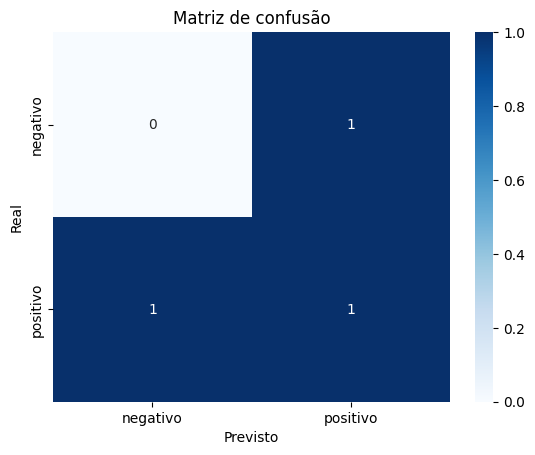

In [14]:
# Avalia o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
# evaluate retorna a perda (loss) e a acurácia (accuracy) no conjunto de teste
# verbose=0 evita a exibição da barra de progresso

# Exibe os resultados da avaliação
print(f"\nAcurácia do modelo no conjunto de teste: {acuracia*100:.2f}%")  # Acurácia em percentual
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")               # Perda com 4 casas decimais

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)  # Retorna probabilidades de cada amostra pertencer à classe 1
y_pred_classes = (y_pred_prob > 0.5).astype(int)  # Converte probabilidades em rótulos binários (0 ou 1)

# Exibir relatório visual com matriz de confusão
print("\n --- Relatório de Classificação ---")
cm = confusion_matrix(y_teste, y_pred_classes)  # Calcula a matriz de confusão
sns.heatmap(
    cm,                      # Matriz a ser exibida
    annot=True,              # Mostrar os valores nas células
    fmt='d',                 # Formato dos valores inteiros
    cmap='Blues',            # Mapa de cores
    xticklabels=['negativo', 'positivo'],  # Rótulos do eixo x
    yticklabels=['negativo', 'positivo']   # Rótulos do eixo y
)
plt.xlabel('Previsto')       # Rótulo do eixo x
plt.ylabel('Real')           # Rótulo do eixo y
plt.title('Matriz de confusão')  # Título do gráfico
plt.show()                   # Exibe o gráfico


## Passo 5: Testar o Modelo com Novas Frases

In [15]:
# Função para prever o sentimento de uma nova frase usando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
  # Converter a frase para uma sequência numérica baseada no vocabulário treinado
  sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

  # Verifica se a sequência está vazia (ou seja, nenhuma palavra foi reconhecida)
  if not sequencia_numerica:
    print(f"Aviso: A frase '{frase_nova}' contém apenas palavras desconhecidas.")
    return "Desconhecido"  # Retorna uma indicação de que a frase não pôde ser processada

  # Extraí a primeira sequência (única neste caso)
  sequencia_numerica = sequencia_numerica[0]

  # Padroniza o comprimento da sequência (como foi feito no treinamento)
  sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

  # Faz a previsão de sentimento (retorna uma probabilidade entre 0 e 1)
  probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

  # Inverte o dicionário de mapeamento para obter os nomes a partir dos números
  mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

  # Classifica o sentimento com base na probabilidade (> 0.5 é positivo)
  if probabilidade_positiva >= 0.5:
    return mapeamento_inverso[1]  # Retorna "positivo"
  else:
    return mapeamento_inverso[0]  # Retorna "negativo"

# Testa o modelo com frases novas e exibe o resultado

print("\n --- Testando o Modelo LSTM com novas Frases ---")

frase_nova_1 = "gostei muito do filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_2}'")  # Corrigido o erro: estava imprimindo sentimento_1

frase_nova_3 = "a aula de pln é ótima!"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal"
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")



 --- Testando o Modelo LSTM com novas Frases ---
Frase: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'positivo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: 'positivo'
Frase: 'a aula de pln é ótima!' -> Sentimento previsto: 'positivo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: 'negativo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
